# Linear Regression and Polynomial Regression

#### *advertising.csv* dataset

In [64]:
#This homework assignment will build three models on the advertising data and evaluate their performance. 
# You can use tools from sklearn to complete this task.

In [65]:
# Source of data: https://www.statlearning.com/s/Advertising.csv

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
url = "https://www.statlearning.com/s/Advertising.csv"
advertising = pd.read_csv(url, index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


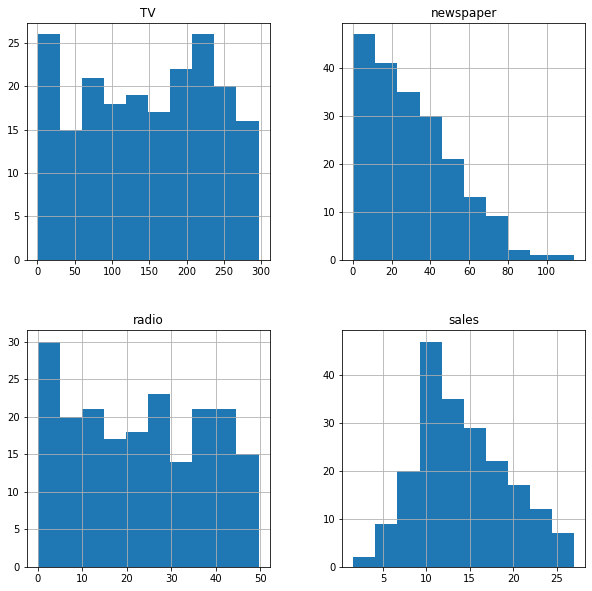

In [68]:
fig = advertising.hist(figsize=(10, 10))

In [70]:
# 1. Use train_test_split to split the data into training set (80%) and test set (20%).

In [71]:
from sklearn.model_selection import train_test_split
training_data, test_data = train_test_split(advertising, test_size=0.2)

In [72]:
# 2. Build a multilinear regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output variable.
#    Name the model model_lr. Train the model on the training set and obtain model predictions on the test set.

In [73]:
from sklearn.linear_model import LinearRegression

input_cols = ["TV", "radio", "newspaper"]

model_lr = LinearRegression()

model_lr.fit(training_data[input_cols], training_data[["sales"]]) 

LinearRegression()

In [74]:
print("Theta 0:", model_lr.intercept_)
print("Theta 1 and Theta 2:", model_lr.coef_)

Theta 0: [3.05160587]
Theta 1 and Theta 2: [[0.04433515 0.18756515 0.00377706]]


In [75]:
# Apply the model to provide prediction for Fred
test_data['prediction'] = model_lr.predict(test_data[input_cols])
test_data.head()

<ipython-input-75-e7ad3988c0ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_lr.predict(test_data[input_cols])


,TV,radio,newspaper,sales,prediction
4,151.5,41.3,58.5,18.5,17.735780
116,75.1,35.0,52.7,12.6,13.145007
111,225.8,8.2,56.5,13.4,14.813921
50,66.9,11.7,36.8,9.7,8.351136
43,293.6,27.7,1.8,20.7,21.270760


In [76]:
# 3. Build a degree 2 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr2. Train the model on the training set and obtain model predictions on the test set.

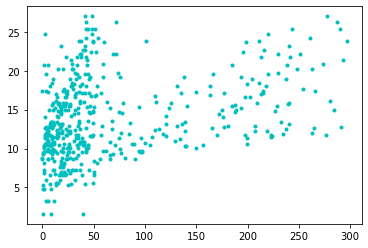

In [77]:
plt.plot(training_data[input_cols], training_data[["sales"]], 'c.')

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [79]:
poly_features1 = PolynomialFeatures(degree=2, include_bias=False)
poly_features1.fit(training_data[input_cols])
X_poly = poly_features1.transform(training_data[input_cols])
model_pr2 = LinearRegression()
model_pr2.fit(X_poly, training_data[["sales"]])
print(model_pr2.coef_, model_pr2.intercept_)

[[ 5.32278711e-02  1.78455281e-02  7.43722216e-03 -1.14095146e-04
   1.08414685e-03 -4.10616973e-05  2.34166811e-04  1.46414767e-04
  -1.48051247e-05]] [4.96976907]


In [80]:
test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
test_data.head()

<ipython-input-80-9a3ef5a268e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr2.predict(poly_features1.transform(test_data[input_cols]))


,TV,radio,newspaper,sales,prediction
4,151.5,41.3,58.5,18.5,18.709177
116,75.1,35.0,52.7,12.6,12.543185
111,225.8,8.2,56.5,13.4,13.257773
50,66.9,11.7,36.8,9.7,9.325100
43,293.6,27.7,1.8,20.7,20.252358


In [81]:
# 4. Build a degree 10 polynomial regression model with 'TV', 'Radio', and 'newspaper' as input variables and 'sales' as output
#    variable. Name the model model_pr10. Train the model on the training set and obtain model predictions on the test set.

In [82]:
poly_features2 = PolynomialFeatures(degree=10, include_bias=False)
poly_features2.fit(training_data[input_cols])
X_poly = poly_features2.fit_transform(training_data[input_cols])
model_pr10 = LinearRegression()
model_pr10.fit(X_poly, training_data[["sales"]])
print(model_pr10.coef_, model_pr10.intercept_)

[[-1.28302772e-11 -2.61106918e-12 -8.77039934e-15 -1.96511563e-12
  -1.77388844e-12 -4.25891863e-13  4.40735845e-13 -5.45499944e-15
  -1.38408910e-16  6.12339983e-15 -2.09590009e-15  1.92845818e-16
  -2.02813873e-16  1.17794660e-16 -3.94290478e-15 -4.30489879e-16
   9.25127744e-16 -1.84336395e-17  8.74180465e-17  1.37511043e-13
   5.73468147e-14  1.19678698e-13  1.42308142e-14  1.30669126e-14
   2.23147767e-14  3.16115594e-15  4.23236944e-15  2.06927823e-15
   1.03897697e-15  1.01849524e-15  1.33378281e-15  1.22314802e-15
   3.47031128e-16 -1.56296595e-15  3.78403969e-12  2.64688114e-12
   4.77625922e-12  6.17126263e-13  4.90537366e-13  8.72939943e-13
   1.28683397e-13  1.82768002e-13  4.76134446e-14  7.47081072e-15
   3.22871491e-14  4.55969974e-14  3.90985658e-14 -1.44680605e-14
  -9.03732076e-14  1.43652067e-14  1.62229695e-14  1.51282114e-14
   1.00877475e-14 -9.16558005e-15 -5.81712990e-14  4.44951183e-11
   7.73500120e-11  1.17495996e-10  1.73285463e-11  1.08780760e-11
   2.14597

In [83]:
test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
test_data.head()

<ipython-input-83-72c594bb49bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = model_pr10.predict(poly_features2.transform(test_data[input_cols]))


,TV,radio,newspaper,sales,prediction
4,151.5,41.3,58.5,18.5,120.766561
116,75.1,35.0,52.7,12.6,-95.965861
111,225.8,8.2,56.5,13.4,3609.798300
50,66.9,11.7,36.8,9.7,4.738585
43,293.6,27.7,1.8,20.7,8632.023631


In [84]:
# 5. Calculate the test MSE of each model using the mean_squared_error function. Which model gives the best MSE?

In [85]:
theta = np.array([3.0516, 0.0443, 0.1876, 0.0037])

list_errors = []

for i in advertising.index:
    x = np.array([1, advertising.loc[i, "TV"], advertising.loc[i, "radio"], advertising.loc[i, "newspaper"]])
    theta_dot_x = theta.dot(x)
    y = advertising.loc[i, "sales"]
    squared_error = (theta_dot_x - y) ** 2
    list_errors.append(squared_error)

print(list_errors)
print("MSE:", np.mean(list_errors))

[2.273008522500005, 4.6764062499999985, 11.429876256100002, 0.5969416643999997, 0.16257024, 32.35505042249999, 0.0015272463999998788, 1.2180653955999992, 0.940434457599999, 3.4929367236000077, 2.0809505024999995, 0.10239360009999815, 3.0085943209000043, 0.768690562499996, 0.3186941209000015, 2.396087284900003, 0.7108176099999995, 1.5549092416000034, 1.6111986489, 0.21967969000000012, 0.014597472400000465, 4.461093136900002, 1.4465353984000007, 0.8698733289000031, 2.122965561599998, 11.743095312399996, 0.005569636899999864, 1.0113922623999998, 0.11705293690000307, 1.3648314276000002, 0.00921408010000009, 0.19348561690000077, 3.4226480016, 1.3707492241000088, 3.6820620769000003, 15.446629248399988, 5.241123422499995, 1.204155075600002, 7.83999999990377e-08, 1.3388341264000012, 0.07686756249999926, 0.04069499289999909, 0.31501278760000084, 0.981664824100001, 0.41610240359999884, 0.0605553663999996, 2.513366329599999, 2.7788223203999958, 2.147016172900001, 1.8323683225, 1.4697197824000046,

In [86]:
predictions_pr2 = model_pr2.predict(poly_features1.transform(test_data[input_cols]))
MSE_pr2 = mean_squared_error(test_data[["sales"]], predictions_pr2)
print("MSE for degree-2 polynomial regression:", MSE_pr2)

MSE for degree-2 polynomial regression: 0.314841506113779


In [87]:
predictions_pr10 = model_pr10.predict(poly_features2.transform(test_data[input_cols]))
mse = mean_squared_error(test_data[["sales"]], predictions_pr10)
print("MSE:", mse)

MSE: 324145196.6540297


In [88]:
print("model_pr2 has the best MSE (0.3148)")

model_pr2 has the best MSE (0.3148)
